In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def d_squared(u,v):
    return (u-v).dot(u-v)

def distortion(X,M,R):
    dist = 0
    for i in range(len(X)):
        for k in range(len(M)):
            dist+= R [i,k]*d_squared(X[i],M[k])
    return dist

def k_mean (X,K,beta = 1.0, max_iters = 20, threshold = 1e-7):
    N,D = X.shape
    R = np.zeros((N,K))
    M = X[np.random.permutation(N), : ] [:K]
    
    J = []
    
    for t in range(max_iters):
        for i in range (N):
            for k in range (K):
                R[i,k] = np.exp(-beta* d_squared(X[i],M [k]))/sum(np.exp(-beta*d_squared(X[i],M[j])) for j in range(K))
                    
        for k in range(K):
            M[k] = R[:,k].dot(X)/R[:,k].sum()
            
        J.append(distortion(X,M,R))
        
        if t>0:
            if np.abs(J[t] - J[t-1])< threshold:
                break
                
    return M,R,J

In [3]:
def main():
    D = 2
    K = 3
    N = int(K*1000)
    
    X0 = np.random.randn((N//K), D)+np.array([2, 2])
    X1 = np.random.randn((N//K), D)+np.array([0, -2])
    X2 = np.random.randn((N//K), D)+np.array([-2, 2])
    
    X = np.vstack((X0,X1,X2))
    
    plt.figure()
    plt.scatter(X[:,0], X[:,1],alpha = 0.5)
    
    
    M,R,J = k_mean(X,K)
    
    plt.figure()
    plt.plot(J)
    
    R_colors = np.random.rand(K,3)
    colors = R.dot(R_colors)
    
    plt.figure()
    plt.scatter(X[:,0],X[:,1], c = colors, alpha = 0.5)
    
    

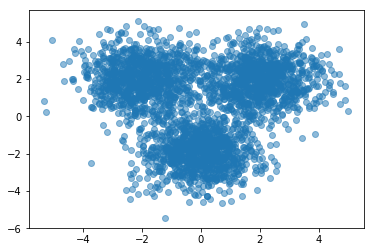

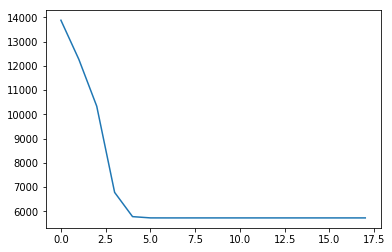

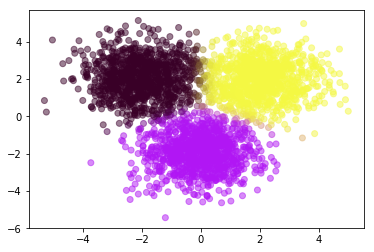

In [4]:
if __name__ == "__main__":
    main()